<a href="https://colab.research.google.com/github/Rithikesh2986/CODSOFT_ML/blob/main/Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hijest/genre-classification-dataset-imdb")

print("Path to dataset files:", path)

100%|██████████| 41.7M/41.7M [00:00<00:00, 214MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hijest/genre-classification-dataset-imdb/versions/1


In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df["plot"], df["genre"], test_size=0.3, random_state=42
)

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred = clf.predict(X_test_tfidf)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

      Action       0.00      0.00      0.00       1.0
      Comedy       0.00      0.00      0.00       1.0
     Fantasy       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
new_plot = ["A spaceship crew fights to survive against hostile aliens."]
new_plot_tfidf = vectorizer.transform(new_plot)
print("Predicted Genre:", clf.predict(new_plot_tfidf)[0])

Predicted Genre: Fantasy


In [ ]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   plot    2 non-null      object
 1   genre   2 non-null      object
dtypes: object(2)
memory usage: 48.0+ bytes


In [ ]:
df_test.describe()

,plot,genre
count,2,2
unique,2,2
top,A group of friends go on a hilarious road trip.,Comedy
freq,1,1


In [ ]:
df_test.isnull().sum()

,0
plot,0
genre,0


In [ ]:
df_train.isnull().sum()

,0
plot,0
genre,0


In [ ]:
df_train.count()

,0
plot,3
genre,3


In [ ]:
df_test.count()

,0
plot,2
genre,2


In [ ]:
df_train.iloc[0:3]

,plot,genre
2,A detective investigates a series of mysteriou...,Thriller
0,A young wizard attends a magical school and ba...,Fantasy
3,Two lovers are separated by war but reunite ye...,Romance


In [ ]:
df_test.shape

(2, 2)

In [ ]:
df_train.shape

(3, 2)

/tmp/ipython-input-683308533.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


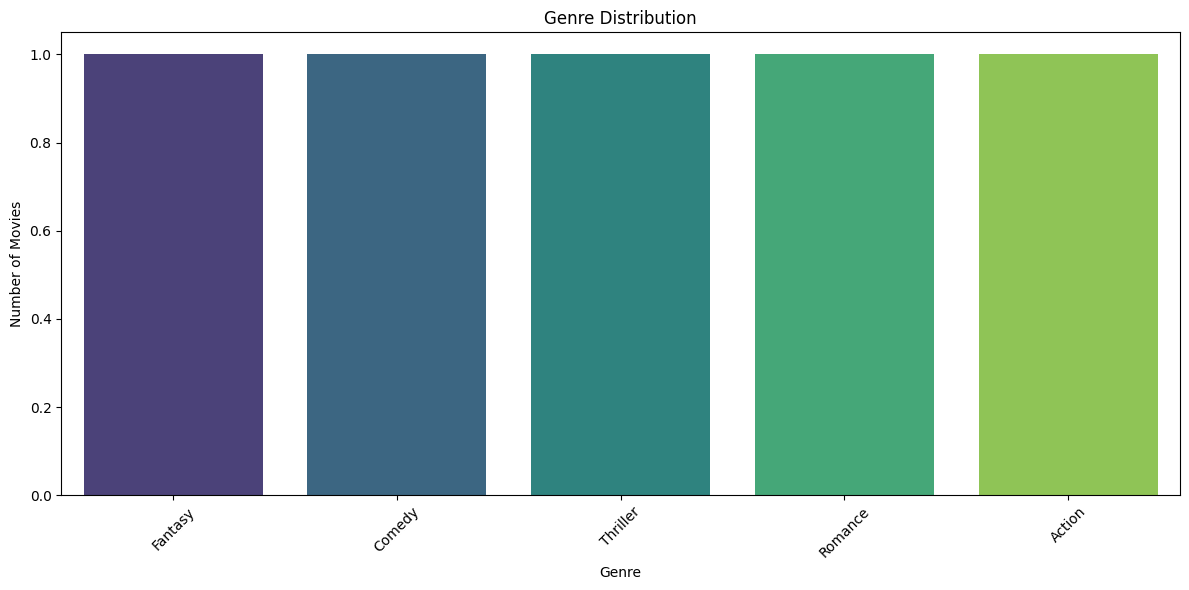

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each genre
plt.figure(figsize=(12, 6))
genre_counts = df['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

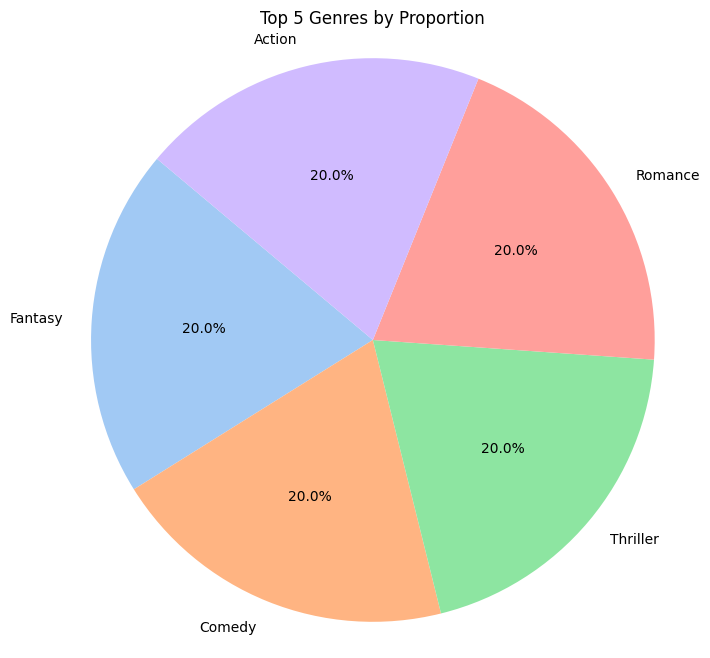

In [ ]:
# Pie chart of top 5 genres
top5 = genre_counts.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Genres by Proportion')
plt.axis('equal')
plt.show()

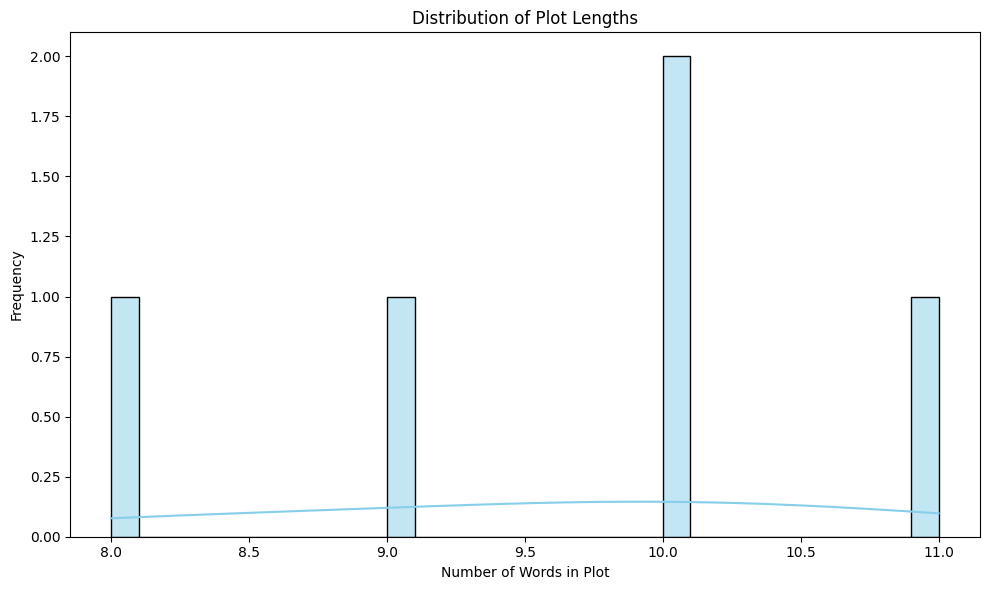

In [ ]:
# Add a column for plot length
df['plot_length'] = df['plot'].apply(lambda x: len(str(x).split()))

# Histogram of plot lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['plot_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Plot Lengths')
plt.xlabel('Number of Words in Plot')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df_combined=pd.concat([df_train,df_test],axis=0)

In [ ]:
df_combined.head()

,plot,genre
2,A detective investigates a series of mysteriou...,Thriller
0,A young wizard attends a magical school and ba...,Fantasy
3,Two lovers are separated by war but reunite ye...,Romance
1,A group of friends go on a hilarious road trip.,Comedy
4,A superhero saves the city from an alien invas...,Action


In [ ]:
df_combined.count()

,0
plot,5
genre,5
